# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Vivekfreak/Datasets/main/EastWestAirlines01.csv")

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df = df.drop(columns=['ID#'])

In [5]:
df.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0


# HC Clustering

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x = scaling.fit_transform(df)
df1 = pd.DataFrame(x)
df1.columns = df.columns
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [7]:
from scipy.cluster import hierarchy

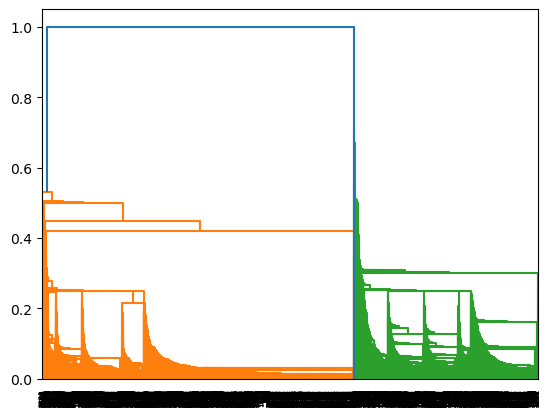

In [8]:
lk = hierarchy.linkage(df1)
dendrogram = hierarchy.dendrogram(lk)

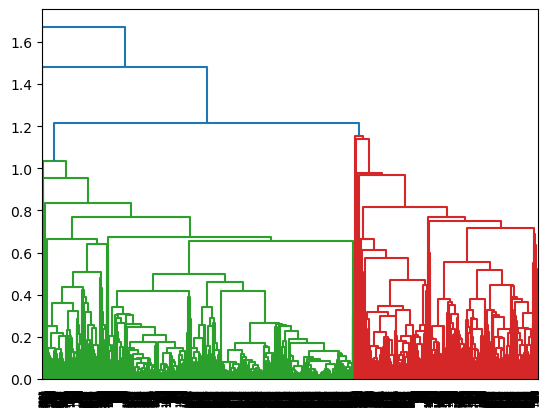

In [9]:
lk = hierarchy.linkage(df1, method='average')
dendrogram = hierarchy.dendrogram(lk)

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc=AgglomerativeClustering(n_clusters=3)
y= hc.fit_predict(df1)

In [12]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [13]:
df['Cluster']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# Kmeans

In [14]:
from sklearn.cluster import KMeans
from scipy .spatial.distance import cdist

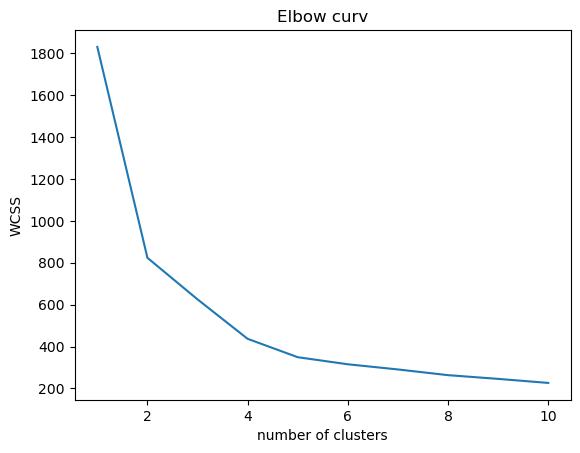

In [15]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
model=KMeans(n_clusters=4)
model.fit(df1)
model.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [17]:
df.drop(columns=['Cluster'], inplace=True)
df.head(1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0


In [18]:
df['Cluster']=model.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [19]:
df.iloc[:,0:4].groupby(df.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles
Cluster,,,,
0,83529.153046,290.453195,1.156018,1.032689
1,40747.617290,92.345809,1.092778,1.017923
2,108317.387376,198.336634,3.915842,1.001238
3,118032.061192,73.112721,3.576490,1.001610


# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [21]:
df3= pd.read_csv('https://raw.githubusercontent.com/Vivekfreak/Datasets/main/EastWestAirlines01.csv')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


In [23]:
df3 = pd.read_csv('https://raw.githubusercontent.com/Vivekfreak/Datasets/main/EastWestAirlines01.csv')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [25]:
df4= df3.iloc[:,1:5]

In [26]:
df4.values

array([[28143,     0,     1,     1],
       [19244,     0,     1,     1],
       [41354,     0,     1,     1],
       ...,
       [73597,     0,     3,     1],
       [54899,     0,     1,     1],
       [ 3016,     0,     1,     1]])

In [27]:
stscaler=StandardScaler().fit(df4.values)
x=stscaler.transform(df4.values)

In [28]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01,
        -9.82418871e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02]])

In [29]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl

,Cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [32]:
df5=pd.concat([df3,cl],axis=1)
df5

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
df5.drop(columns=['ID#'],inplace=True)

In [34]:
df5.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
-1,603717.941176,3833.529412,2.411765,1.235294,1.000000,24161.117647,23.117647,2754.529412,9.000000,5947.882353,0.823529
0,71611.732437,129.379660,2.068476,1.000000,1.012427,17150.664976,11.504438,450.658382,1.337053,4113.043622,0.368501
1,52231.400000,66.666667,1.000000,3.000000,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
2,38332.166667,0.000000,1.000000,2.000000,1.000000,9178.000000,14.875000,233.333333,0.833333,3755.875000,0.333333
